<a href="https://colab.research.google.com/github/Maithraanand/Financial-Machine-Learning-FML-/blob/main/FML_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STOCK PREDICTION

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Load and display the Data**

In [ ]:
# Load the data
df = pd.read_csv('Quote-Equity-HCLTECH-EQ-02-06-2024-to-02-09-2024.csv', encoding='UTF-8-SIG')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

         Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  30-Aug-2024      EQ  1,751.85  1,766.30  1,742.20     1,751.85  1,749.10   
1  29-Aug-2024      EQ  1,714.00  1,756.00  1,697.25     1,719.45  1,750.45   
2  28-Aug-2024      EQ  1,712.55  1,737.75  1,693.05     1,711.60  1,714.00   
3  27-Aug-2024      EQ  1,725.85  1,756.85  1,705.10     1,719.45  1,706.00   
4  26-Aug-2024      EQ  1,671.00  1,734.00  1,667.10     1,661.45  1,731.95   

     close      vwap     52W H     52W L     VOLUME              VALUE   \
0  1,753.25  1,754.62  1,766.30  1,139.30  47,92,561  8,40,91,17,094.05   
1  1,751.85  1,743.29  1,756.85  1,139.30  51,12,407  8,91,24,13,845.35   
2  1,719.45  1,724.11  1,756.85  1,139.30  25,16,461  4,33,86,61,403.90   
3  1,711.60  1,729.29  1,756.85  1,139.30  35,56,487  6,15,02,06,994.95   
4  1,719.45  1,704.59  1,734.00  1,139.30  26,72,708  4,55,58,72,150.30   

  No of trades   
0      1,38,406  
1      2,04,310  
2        83,998  
3 

**Data Preprocessing**

In [ ]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Remove commas from numeric columns and convert to float
numeric_columns = ['OPEN', 'HIGH', 'LOW', 'close', 'VOLUME']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

# Create features (X) and target (y)
X = df[['OPEN', 'HIGH', 'LOW']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Lasso Regression Model**

In [ ]:
# Train the Lasso regression model
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

Mean Squared Error: 73.55453776797191
R-squared Score: 0.9949144297592112


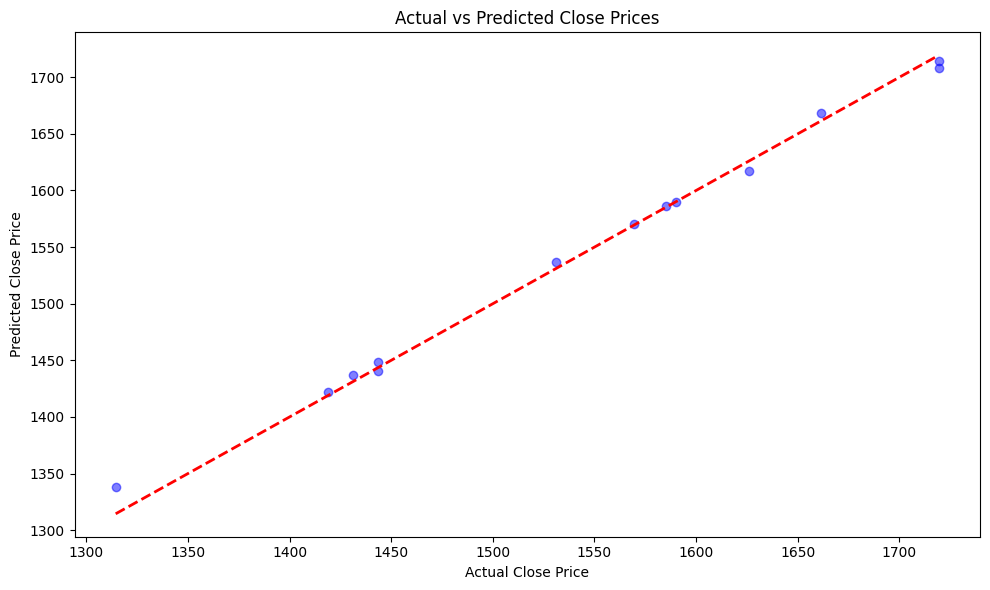

Model Coefficients:
OPEN: -0.22092956857853255
HIGH: 0.7111042046587482
LOW: 0.47997715844969335
Intercept: 44.34647189366956
Sample of Actual vs Predicted Values:
     Actual    Predicted
11  1626.15  1616.882640
5   1661.45  1668.337750
61  1314.45  1338.036545
4   1719.45  1708.397775
56  1418.75  1422.388235
13  1585.25  1586.602788
45  1443.70  1448.202393
49  1443.45  1440.736358
36  1531.10  1537.118670
2   1719.45  1714.340199


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.tight_layout()
plt.show()

# Print model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

# Display a sample of actual vs predicted values
sample_size = min(10, len(y_test))
sample = pd.DataFrame({'Actual': y_test.iloc[:sample_size], 'Predicted': y_pred[:sample_size]})
print("Sample of Actual vs Predicted Values:")
print(sample)

**Predicting Future Values**

In [ ]:
# Create a DataFrame with the future data
future_data = pd.DataFrame({
    'OPEN': [1240.0, 1250.0],  # Example future open prices
    'HIGH': [1255.0, 1260.0],  # Example future high prices
    'LOW': [1235.0, 1245.0],   # Example future low prices
})

# Predict the close prices for future dates
future_predictions = model.predict(future_data)

# Display the predictions
print("Future Predictions:")
for i, prediction in enumerate(future_predictions):
    print(f"Future Date {i+1}: Predicted Close Price = {prediction}")

Future Predictions:
Future Date 1: Predicted Close Price = 1255.6013743883896
Future Date 2: Predicted Close Price = 1261.7473713103948
